In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from scipy.stats import multivariate_normal

# Punto 2: Experimento con datos reales

Las mediciones de temperatura $T$ (unidades en $°C$) y humedad relativa $H$ (unidades en $\%$) en un invernadero real de un cultivo de rosas se modelan como **variables aleatorias Gaussianas conjuntas** a través del vector aleatorio $Z = [T, H]^T$, cuyo vector de medias y matriz de covarianza son desconocidos. Sin embargo, se logran obtener varias observaciones de Z, y se guardan en el archivo *datosCaso6.txt*.

## a) Grafique las observaciones en el plano coordenado $H$ vs $T$ (indique las unidades de las variables en las etiquetas de los ejes), y realice una inspección visual sobre el comportamiento de los datos. Por ejemplo, hable sobre la correlacion entre la temperatura y la humedad, valores más comunes de temperatura y humedad, entre otros aspectos del comportamiento de los datos.

Text(0.5, 1.0, '$H$ vs. $T$')

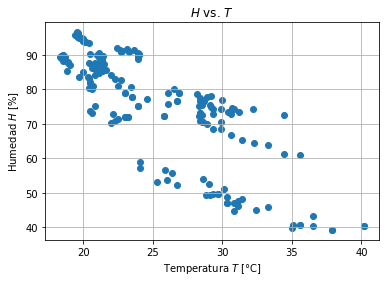

In [2]:
# Se importan los datos del .txt
filename = 'datosCaso6.txt'
T = np.loadtxt(filename)[:, 0]
H = np.loadtxt(filename)[:, 1]

# Se grafica variable dependiente contra variable independiente en el plano R^2.
plt.scatter(T, H)
plt.grid()
plt.xlabel(r'Temperatura $T$ [°C]')
plt.ylabel(r'Humedad $H$ [%]')
plt.title(r'$H$ vs. $T$')

Se puede observar una relación inversamente proporcional entre las variables de humedad y temperatura en el invernadero: a medida que la temperatura aumenta, la humedad disminuye y viceversa. 

Del mismo modo, se puede notar que la mayoría de los datos se encuentran en un rango de temperatura entre los 18 °C y 25 °C, lo que corresponde a un rango de valores de humedad alrededor del 70% y el 95%. 

La relación entre las variables parece tener una tendencia aproximadamente lineal para todos los rangos de temperatura y humedad.

## b) Encuentre la estimación el vector de medias y la matriz de covarianza a partir de los datos obtenidos utilizando las funciones de Matlab *mean* y *cov* o sus equivalentes en Python. Escriba la PDF conjunta que resulta con estos parámetros estimados. Grafique las observaciones en un plano coordenado $H$ vs $T$, y traslape las curvas de nivel de la PDF estimada.

Media estimada de T: 24.792800000000003

Media estimada de H: 76.748

Matriz de covarianza estimada:
 [[ 26.71911172 -68.84481849]
 [-68.84481849 253.19949347]]



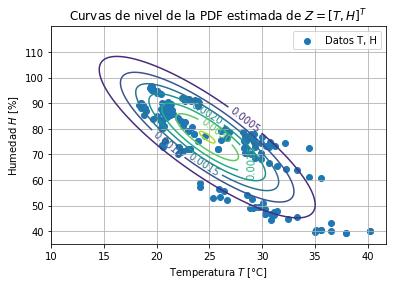

In [3]:
# Se encuentra la media de cada variable aleatoria y la matriz de covarianza entre las dos variables aleatorias
# usando las funciones predeterminadas de NumPy para tales efectos.
muT_estim = np.mean(T)
muH_estim = np.mean(H)
mat_cov_estim = np.cov(np.stack((T, H), axis = 0))

print(f'Media estimada de T: {muT_estim}\n')
print(f'Media estimada de H: {muH_estim}\n')
print(f'Matriz de covarianza estimada:\n {mat_cov_estim}\n')

# Se generan vectores con valores de 't' y 'h' para generar una malla (T1, H1) sobre la cual dibujar las curvas de nivel.
step = 0.05
t = np.arange(10, 40, step)
h = np.arange(40, 120, step)

# Se genera la malla (T1, H1). T1 y H1 son matrices que representan los puntos en el plano R^2.
T1, H1 = np.meshgrid(t, h)

# Se usa la función multivariate_normal para definir la función Gaussiana en el eje Z que se genera con los diferentes datos en H1 y T1.
# Se define el vector Z como la pdf Gaussiana representada por el vector de medias [muT_estim, muH_estim] y la matriz de covarianza mat_cov_estim.
pos = np.dstack((T1, H1))
rv = multivariate_normal([muT_estim, muH_estim], mat_cov_estim)
Z = rv.pdf(pos)

# Se grafican las curvas de nivel de la pdf de Z junto con los datos T y H entregados en el archivo de texto.
fig, ax = plt.subplots()
CS = plt.contour(T1, H1, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_xlabel(r'Temperatura $T$ [°C]')
ax.set_ylabel(r'Humedad $H$ [%]')
ax.set_title(r'Curvas de nivel de la PDF estimada de $Z = [T, H]^T$')
ax.grid()
plt.scatter(T, H)
plt.legend(['Datos T, H'])
plt.show()

## La PDF conjunta que resulta de estos datos estimados está dada por

$$f_Z(z) = \frac{1}{2\pi\sqrt{\det{C_Z}}}\exp\left({-\frac{1}{2}}(z - \mu_Z)^T C_Z^{-1} (z - \mu_Z)\right)$$

en donde

$$z = \begin{bmatrix} t \\ h \end{bmatrix}$$

$$\mu_Z = \begin{bmatrix} \mu_T \\ \mu_H \end{bmatrix} = \begin{bmatrix} 24.793 \\ 76.748 \end{bmatrix}$$

$$C_Z = \begin{bmatrix} \sigma_{T}^2 & \text{cov}(T, H) \\ \text{cov}(T, H) & \sigma_{H}^2 \end{bmatrix} = \begin{bmatrix} 26.719 & -68.844 \\ -68.844 & 253.199 \end{bmatrix}$$

## c) Se tomaron unas muestras nuevas de parejas de temperatura y humedad, en el archivo *datosNuevosCaso6.txt*. Sin embargo, algunos de los datos de temperatura y otros de humedad se perdieron durante las mediciones. Es decir, en algunos datos se dispone de la medición de una de las variables pero no de la otra. Estos vacíos se llenaron con valores de -10000 en el archivo. Para resolver este problema de medición, se requiere utilizar la estimación MMSE para llenar estos vacíos de una forma que es consistente con la relación estadística entre temperatura y humedad.

- Utilizando la información encontrada en el enunciado b), encuentre y escriba la expresión del estimador MMSE lineal de T dada la observación de H, denotado como $T_{hat-MMSE}(h)$.
- Utilizando la información encontrada en el enunciado b), encuentre y escriba la expresión del estimador MMSE lineal de H dada la observación de T, denotado como $H_{hat-MMSE}(t)$.

Utilizando estas ecuaciones, estime cada uno de los valores incompletos en el archivo *datosNuevosCaso6.txt*. Grafique cada una de las parejas de datos ya completos con las estimaciones, y traslape el contorno de la PDF encontrada en el enunciado (b) para verificar si los datos estimados son consistentes
con la distribución.

Se encuentra $T_{hat-MMSE}(h)$ como

$$T_{hat-MMSE}(h) = E[T] + \frac{\text{cov}(T, H)}{\sigma_H^2}[H - E[H]]$$

y

$H_{hat-MMSE}(t)$ como

$$H_{hat-MMSE}(t) = E[H] + \frac{\text{cov}(H, T)}{\sigma_T^2}[T - E[T]]$$




Text(0.5, 1.0, 'Estimador LMMSE de $H$ basado en $T$')

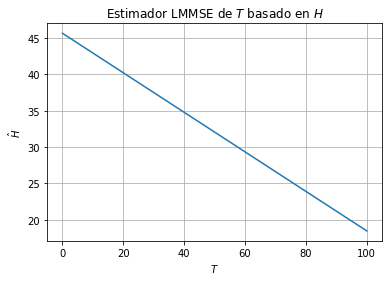

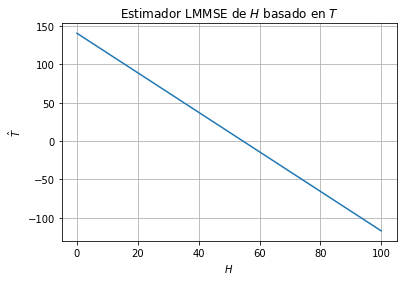

In [4]:
# Se importan los datos del segundo .txt
filename2 = 'datosNuevosCaso6.txt'
T2 = np.loadtxt(filename2)[:, 0]
H2 = np.loadtxt(filename2)[:, 1]

# Se crea estimador lineal de T
def That(muT, muH, covTH, sigmaH, H):
    return muT + (covTH/sigmaH)*(H-muH)

# Se estima el valor de T para los valores de H_est
H_est = np.linspace(0, 100, 50)
Th = []

# Para cada valor de H en H_est, calcular su T estimado correspondiente.
for i in range(len(H_est)):
    Th.append(That(muT_estim, muH_estim, mat_cov_estim[0, 1], mat_cov_estim[1,1], H_est[i]))

# Se crea estimador lineal de H
def Hhat(muH, muT, covHT, sigmaT, T):
    return muH + (covHT/sigmaT)*(T-muT)

# Se estima el valor de T para los valores de T_est
T_est = np.linspace(0, 100, 50)
Hh = []

# Para cada valor de T en T_est, calcular su H estimado correspondiente.
for i in range(len(T_est)):
    Hh.append(Hhat(muH_estim, muT_estim, mat_cov_estim[1, 0], mat_cov_estim[0,0], T_est[i]))

# Se grafica el estimador LMMSE de T basado en H
plt.plot(H_est, Th)
plt.grid()
plt.xlabel(r'$T$')
plt.ylabel(r'$\^{H}$')
plt.title(r'Estimador LMMSE de $T$ basado en $H$')

plt.figure()

# Se grafica el estimador LMMSE de H basado en T
plt.plot(T_est, Hh)
plt.grid()
plt.xlabel(r'$H$')
plt.ylabel(r'$\^{T}$')
plt.title(r'Estimador LMMSE de $H$ basado en $T$')

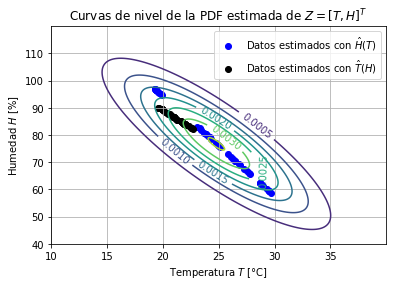

In [5]:
# Se generan copias de los vectores extraidos del .txt nuevo, para poder reemplazar sus valores sin modificar los datos originales.
H2_completo = H2.copy()
T2_completo = T2.copy()

# Para cada dato de temperatura faltante, se calcula su valor de acuerdo a su dato de humedad correspondiente, y se
# coloca este valor estimado en su respectiva posición dentro de la copia creada del vector de humedad.
# Para cada dato de humedad faltante, se calcula su valor de acuerdo a su dato de temperatura correspondiente, y se
# coloca este valor estimado en su respectvia posición dentro de la copia creada del vector de temperatura.
for i in range(len(H2)):
    if H2[i] == -10000:
        H_estimado = np.round(Hhat(muH_estim, muT_estim, mat_cov_estim[1, 0], mat_cov_estim[0,0], T2[i]), 1)
        H2_completo[i] = H_estimado
    if T2[i] == -10000:
        T_estimado = np.round(That(muT_estim, muH_estim, mat_cov_estim[0, 1], mat_cov_estim[1,1], H2[i]), 1)
        T2_completo[i] = T_estimado

# Se generan vectores con valores de 't' y 'h' para generar una malla (T_grid, H_grid) sobre la cual dibujar las curvas de nivel.
step = 0.05
t = np.arange(10, 40, step)
h = np.arange(40, 120, step)

# Se genera la malla (T_grid, H_grid). T_grid y H_grid son matrices que representan los puntos en el plano R^2.
T_grid, H_grid = np.meshgrid(t, h)

# Se usa la función multivariate_normal para definir la función Gaussiana en el eje Z que se genera con los diferentes datos en H_grid y T_grid.
# Se define el vector Z como la pdf Gaussiana representada por el vector de medias [muT_estim, muH_estim] y la matriz de covarianza mat_cov_estim.
pos = np.dstack((T_grid, H_grid))
rv = multivariate_normal([muT_estim, muH_estim], mat_cov_estim)
Z = rv.pdf(pos)

# Se grafican las curvas de nivel de la pdf de Z junto con los datos T y H estimados a partir de los entregados en el archivo de texto nuevo.
fig, ax = plt.subplots()
CS = plt.contour(T_grid, H_grid, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_xlabel(r'Temperatura $T$ [°C]')
ax.set_ylabel(r'Humedad $H$ [%]')
ax.set_title(r'Curvas de nivel de la PDF estimada de $Z = [T, H]^T$')
ax.grid()

azulesT = []
negrosT = []
azulesH = []
negrosH = []

for i in range(len(H2_completo)):
    if i < 50:
        azulesT.append(T2_completo[i])
        azulesH.append(H2_completo[i])
    else:
        negrosT.append(T2_completo[i])
        negrosH.append(H2_completo[i])

plt.scatter(azulesT, azulesH, c='b', label=r'Datos estimados con $\^{H}(T)$')
plt.scatter(negrosT, negrosH, c='k', label=r'Datos estimados con $\^{T}(H)$')
plt.legend()

Se puede notar que los datos estimados de cada variable son consistentes con la PDF estimada del vector aleatorio $Z$.